# 2019/02/14    - test campaign 2, day 4

##    4.7 Measure M1 and M3 influence functions (M1 IF 1,2,29,31-40; same for M3)
##    5.1 Measure M1 and M3 with lateral actuator force (1200 N total in X direction)
##    4.8 Optimize M1-M3-M1 figure using LSST bending modes (5 iterations, set3 M1 only)

In [2]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

dateID = 190214

<Figure size 432x288 with 0 Axes>

In [3]:
testID = '4-7'
nIF = 13 # we measured 13IFs
pattern = '%s/Processed/%d_%s/*filename list.xlsx'%(
    dataDir, dateID, testID)
summaryFile = glob.glob(pattern)[0]
df = pd.read_excel(summaryFile, sheet_name = 'Corrected Maps', skiprows=2)
idx = np.unique(df['Actuator'][:nIF*2], return_index=True)[1] 
mode2actID = [df['Actuator'][idx] for idx in sorted(idx)]

## We made the following measurements on this day

### M1 single actuator influence function: 1, 2, 29, then 31-40. 
The list of actuators ranked by priority were given to the Mirror Lab by LSST
1,2,29 were for repeatibility test

4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 0, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if+1-1 burst50 morph -.h5: Thu Feb 14 09:49:22 2019 
4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 1, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if-1-1 burst50 morph -.h5: Thu Feb 14 09:52:21 2019 
4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 2, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if-1-2 burst50 morph -.h5: Thu Feb 14 09:55:09 2019 
4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 3, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if+1-2 burst50 morph -.h5: Thu Feb 14 09:58:08 2019 
4-7 Influence function 2 --- Actuator 113 --- irow = 1, icol = 0, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if+2-1 burst50 morph -.h5: Thu Feb 14 10:07:29 2019 
4-7 Influence function 2 --- Actuator 113 --- irow = 1, icol = 1, ---------

/Processed/190214_4-7/190214 4-7 M1 if-40-1 burst50 morph -.h5: Thu Feb 14 12:27:13 2019 
4-7 Influence function 40 --- Actuator 109 --- irow = 12, icol = 2, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if-40-2 burst50 morph -.h5: Thu Feb 14 12:30:06 2019 
4-7 Influence function 40 --- Actuator 109 --- irow = 12, icol = 3, -----------------------------
/Processed/190214_4-7/190214 4-7 M1 if+40-2 burst50 morph -.h5: Thu Feb 14 12:33:11 2019 


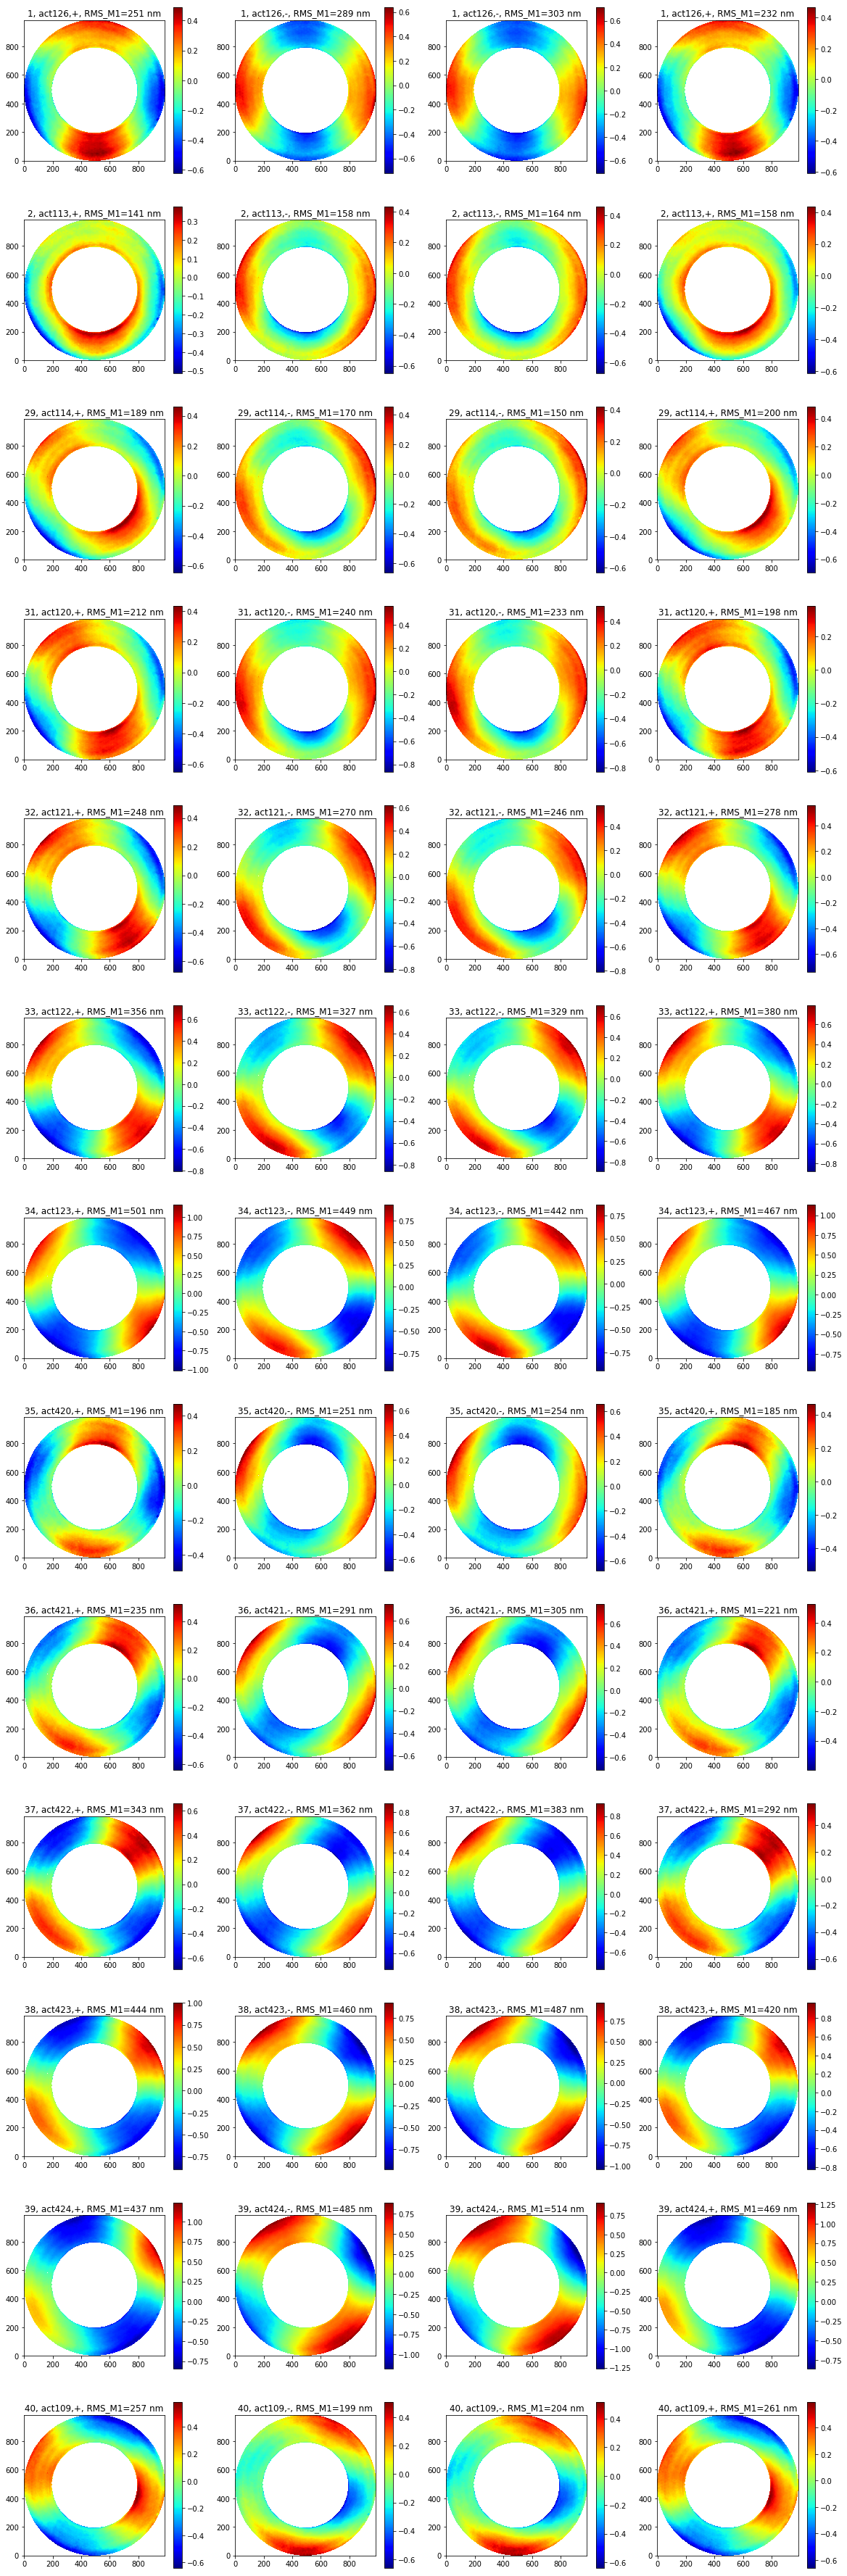

In [4]:
fig, ax = plt.subplots(nIF,4,figsize=(20,5*nIF))
i = 0
imode = 0
for modeID in np.hstack((1, 2, 29, np.arange(31, 41))):
    imode += 1
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s Influence function %s --- Actuator %d --- irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, mode2actID[imode-1], irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M1 if%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%d, act%d,%s, RMS_M1=%.0f nm'%(modeID, mode2actID[imode-1], bend[0], m1rms))

### Same measurements for M3

4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 0, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if+1-1 burst20 morph -.h5: Thu Feb 14 12:40:53 2019 
4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 1, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if-1-1 burst20 morph -.h5: Thu Feb 14 12:41:57 2019 
4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 2, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if-1-2 burst20 morph -.h5: Thu Feb 14 12:42:51 2019 
4-7 Influence function 1 --- Actuator 126 --- irow = 0, icol = 3, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if+1-2 burst20 morph -.h5: Thu Feb 14 12:43:55 2019 
4-7 Influence function 2 --- Actuator 113 --- irow = 1, icol = 0, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if+2-1 burst20 morph -.h5: Thu Feb 14 12:45:01 2019 
4-7 Influence function 2 --- Actuator 113 --- irow = 1, icol = 1, ---------

4-7 Influence function 39 --- Actuator 424 --- irow = 11, icol = 1, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if-39-1 burst20 morph -.h5: Thu Feb 14 13:29:34 2019 
4-7 Influence function 39 --- Actuator 424 --- irow = 11, icol = 2, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if-39-2 burst20 morph -.h5: Thu Feb 14 13:30:44 2019 
4-7 Influence function 39 --- Actuator 424 --- irow = 11, icol = 3, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if+39-2 burst20 morph -.h5: Thu Feb 14 13:31:48 2019 
4-7 Influence function 40 --- Actuator 109 --- irow = 12, icol = 0, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if+40-1 burst20 morph -.h5: Thu Feb 14 13:33:33 2019 
4-7 Influence function 40 --- Actuator 109 --- irow = 12, icol = 1, -----------------------------
/Processed/190214_4-7/190214 4-7 M3 if-40-1 burst20 morph -.h5: Thu Feb 14 13:34:37 2019 
4-7 Influence function 40 --- Actuator 109 --- irow = 12, ic

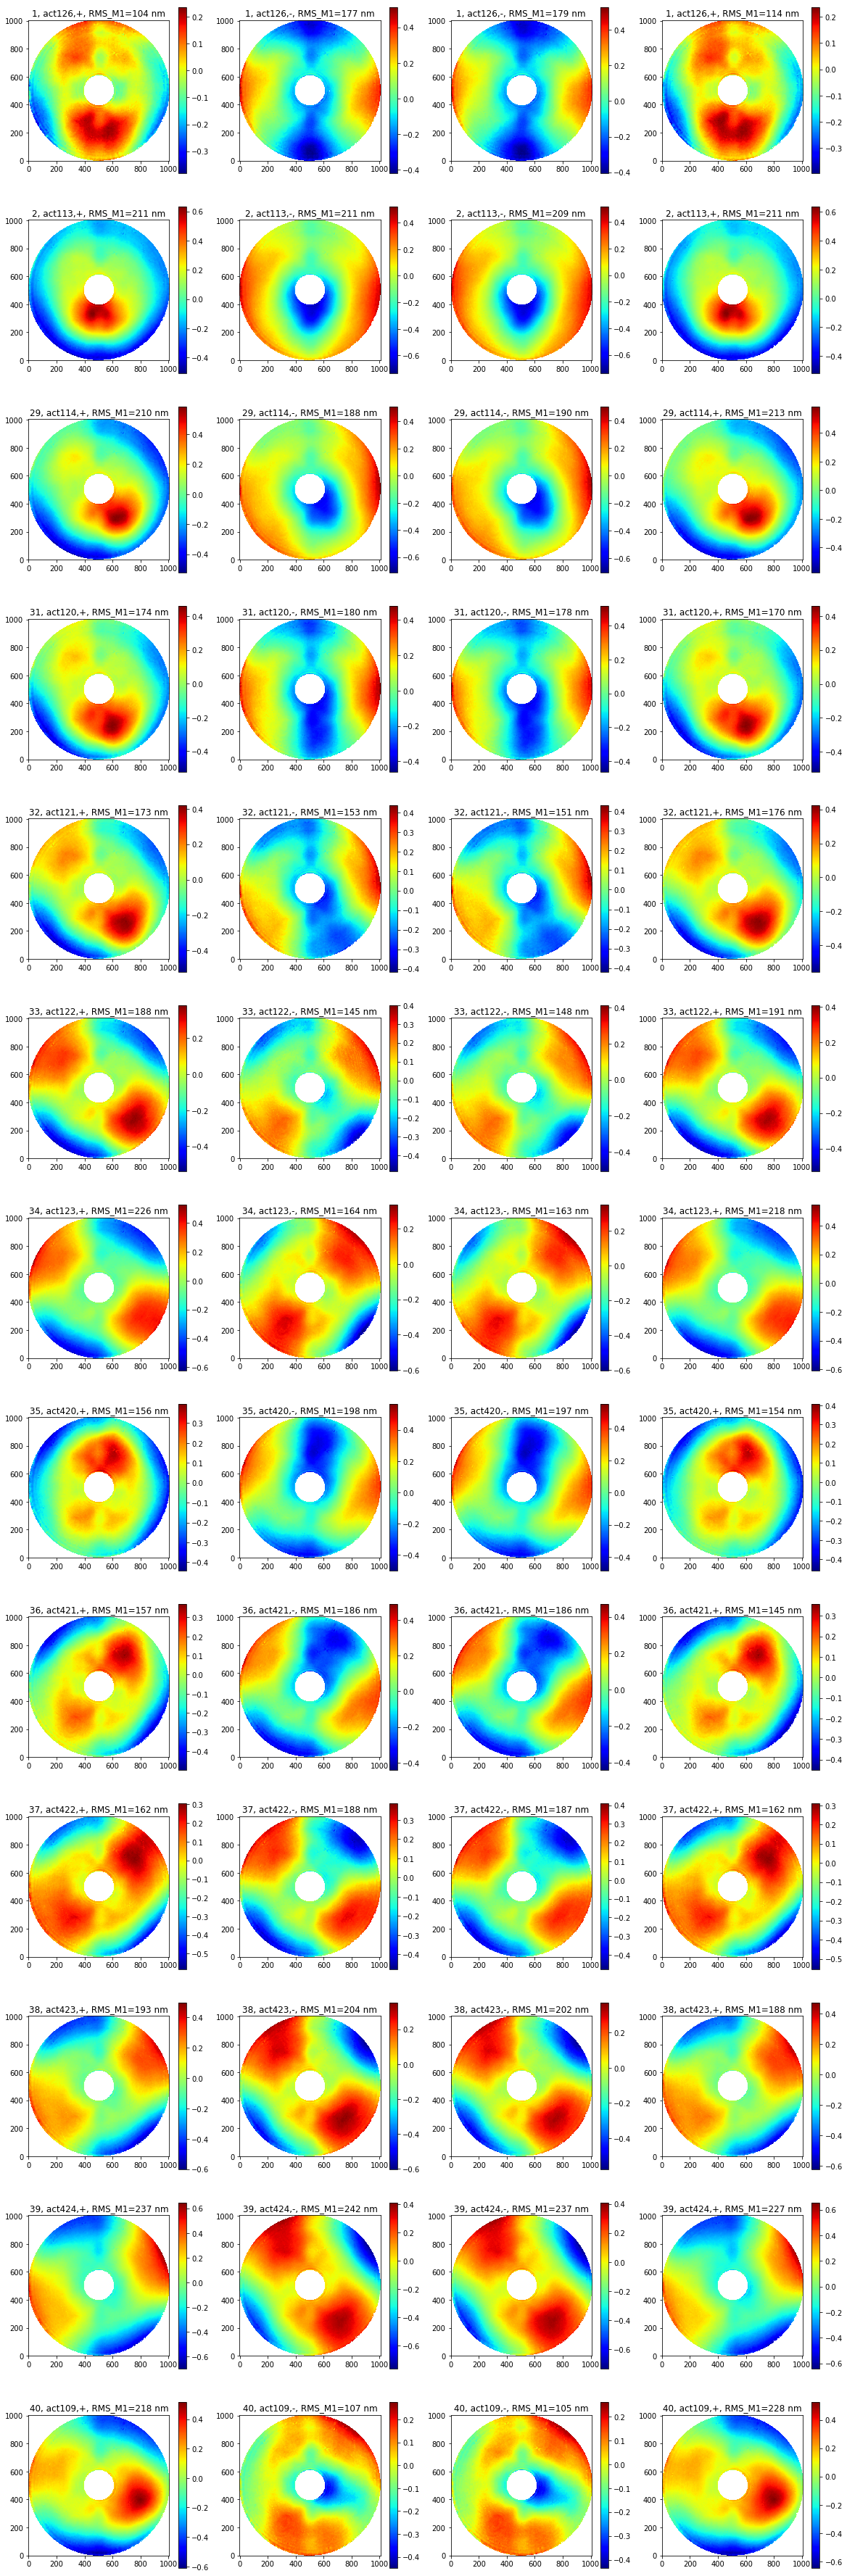

In [6]:
fig, ax = plt.subplots(nIF,4,figsize=(20,5*nIF))
i = 0
imode = 0
for modeID in np.hstack((1, 2, 29, np.arange(31, 41))):
    imode += 1
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s Influence function %s --- Actuator %d --- irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, mode2actID[imode-1], irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M3 if%s*burst*morph -.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m3s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

        img = ax[irow][icol].imshow(m3s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%d, act%d,%s, RMS_M1=%.0f nm'%(modeID, mode2actID[imode-1], bend[0], m3rms))

### The Measured single actuator influence functions

In [7]:
from FATABLE import *

fat = np.array(FATABLE)
actID = np.int16(fat[:, FATABLE_ID])
xact = np.float64(fat[:, FATABLE_XPOSITION])
yact = np.float64(fat[:, FATABLE_YPOSITION])

4-7 bending mode 109 ------ irow = 0, icol = 0, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-109.h5: date not in h5 file. 
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-109.h5: date not in h5 file. 
4-7 bending mode 113 ------ irow = 0, icol = 1, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-113.h5: date not in h5 file. 
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-113.h5: date not in h5 file. 
4-7 bending mode 114 ------ irow = 0, icol = 2, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-114.h5: date not in h5 file. 
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-114.h5: date not in h5 file. 
4-7 bending mode 120 ------ irow = 0, icol = 3, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-120.h5: dat

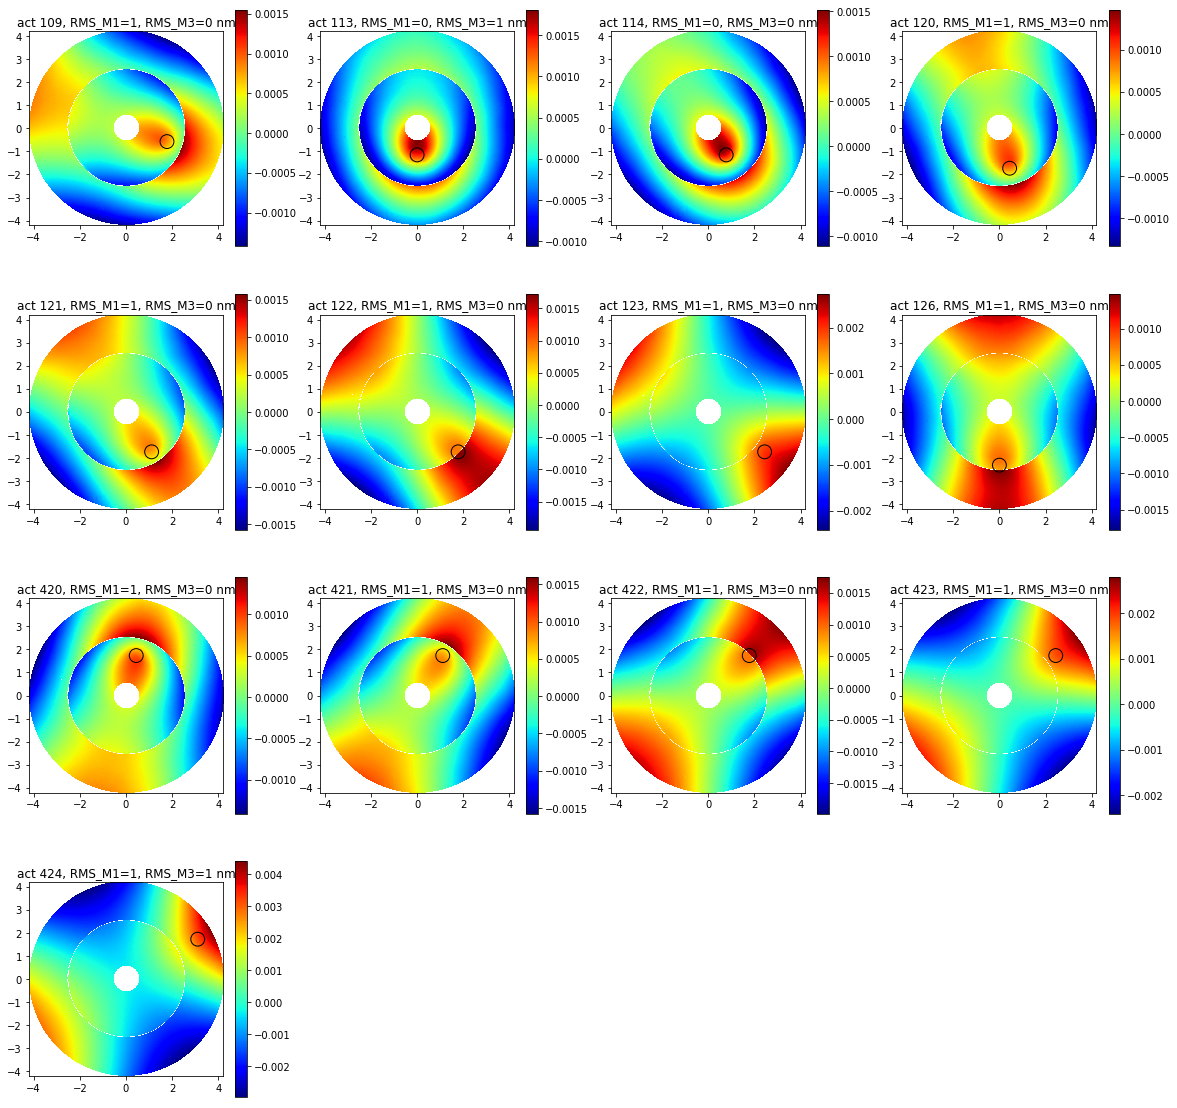

In [8]:
fig, ax = plt.subplots(4,4,figsize=(20,5*4))
i = 0
for modeID in sorted(mode2actID):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/*number-%d.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    img = ax[irow][icol].imshow(s, origin='lowerleft', extent = [x1[0,0], x1[0,-1], y1[0,0], y1[-1,0]])
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('act %d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
    
    actIdx = np.where(actID == modeID)
    circ = Circle((xact[actIdx],yact[actIdx]),0.3, fill = False)
    ax[irow][icol].add_patch(circ)

fig.delaxes(ax.flatten()[-3])    
fig.delaxes(ax.flatten()[-2])
fig.delaxes(ax.flatten()[-1])

### Scaling factors that need to be added to the FEA influence functions

In [9]:
resultsFile = glob.glob('%s/Processed/%d_%s/Combined/FittedCoeff*txt'%(
    dataDir, dateID, testID))[0]
df = pd.read_csv(resultsFile, sep="\t")
actID13 = df['Actuator']
idx = actID13>0
actID13 = actID13[idx]
scaleF = df['normalizedFit'][idx]

#update ML_IF_scale.txt
aa = np.loadtxt('data/ML_IF_scale.txt', skiprows=1)
if sum(aa[:,2]>0)==30:
    i = 0
    for act in actID13:
        idx = np.where(actID == act)[0][0]
        if aa[idx, 2]<1e-3:
            aa[idx, 2] = scaleF[i]
        else:
            aa[idx, 3] = scaleF[i]
        i+=1
    np.savetxt('data/ML_IF_scale.txt', aa, 
               header = 'actID\t scaleF_during_test \t scaleF_updated \t scaleF_repeated', 
               fmt='%.0f \t %.5f \t %.5f \t %.5f', comments='')

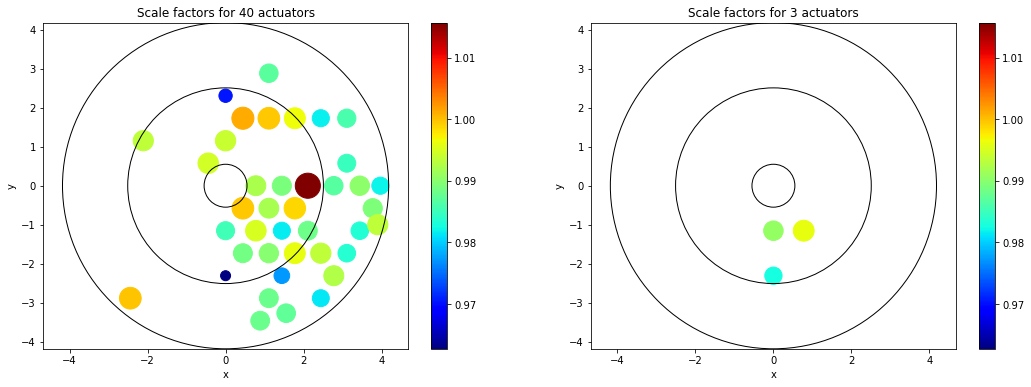

In [11]:
fig, ax = plt.subplots(1,2,figsize=(18, 6))

for i in range(2):
    bb = aa[:,i+2] #columns 2 and 3
    bb[bb==0] = np.nan

    if i==0:
        vmin = min(bb)
        vmax = max(bb)
        bbmin = min(bb[bb>1e-5])-0.01
    img = ax[i].scatter(xact, yact, (bb-bbmin)*1e4, bb, vmin=vmin, vmax=vmax)

    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].axis('equal')
    ax[i].set_xlim([-m1ORC, m1ORC])
    ax[i].set_ylim([-m1ORC, m1ORC])
    plt.colorbar(img, ax=ax[i])
    ax[i].set_title('Scale factors for %d actuators'%sum(~np.isnan(bb)))

    circ = Circle((0, 0),m1ORC, fill = False)
    ax[i].add_patch(circ)
    circ = Circle((0, 0),m3ORC, fill = False)
    ax[i].add_patch(circ)
    circ = Circle((0, 0),m3IRC, fill = False)
    ax[i].add_patch(circ)

In [126]:
idx = np.where(aa[:,3]>0)[0]
print('ID  1st      ppt    repeat')
for i in idx:
    print('%.0f %.5f %.3f, %.5f'%(aa[i,0], aa[i,2], aa[i,1], aa[i,3]))

ID  1st      ppt    repeat
113 0.98545 0.985, 0.99077
114 0.99499 0.995, 0.99619
126 0.96272 0.963, 0.98261


### Residual maps from the fits

4-7 bending mode 109 ------ irow = 0, icol = 0, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-109 - Residual Map of Actuator 109.h5: date not in h5 file. 
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-109 - Residual Map of Actuator 109.h5: date not in h5 file. 
4-7 bending mode 113 ------ irow = 0, icol = 1, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-113 - Residual Map of Actuator 113.h5: date not in h5 file. 
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-113 - Residual Map of Actuator 113.h5: date not in h5 file. 
4-7 bending mode 114 ------ irow = 0, icol = 2, -----------------------------
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-114 - Residual Map of Actuator 114.h5: date not in h5 file. 
/Processed/190214_4-7/Combined/Combined M1M3 IFMap for actuator number-114 - Residual Map of Actuator 114.

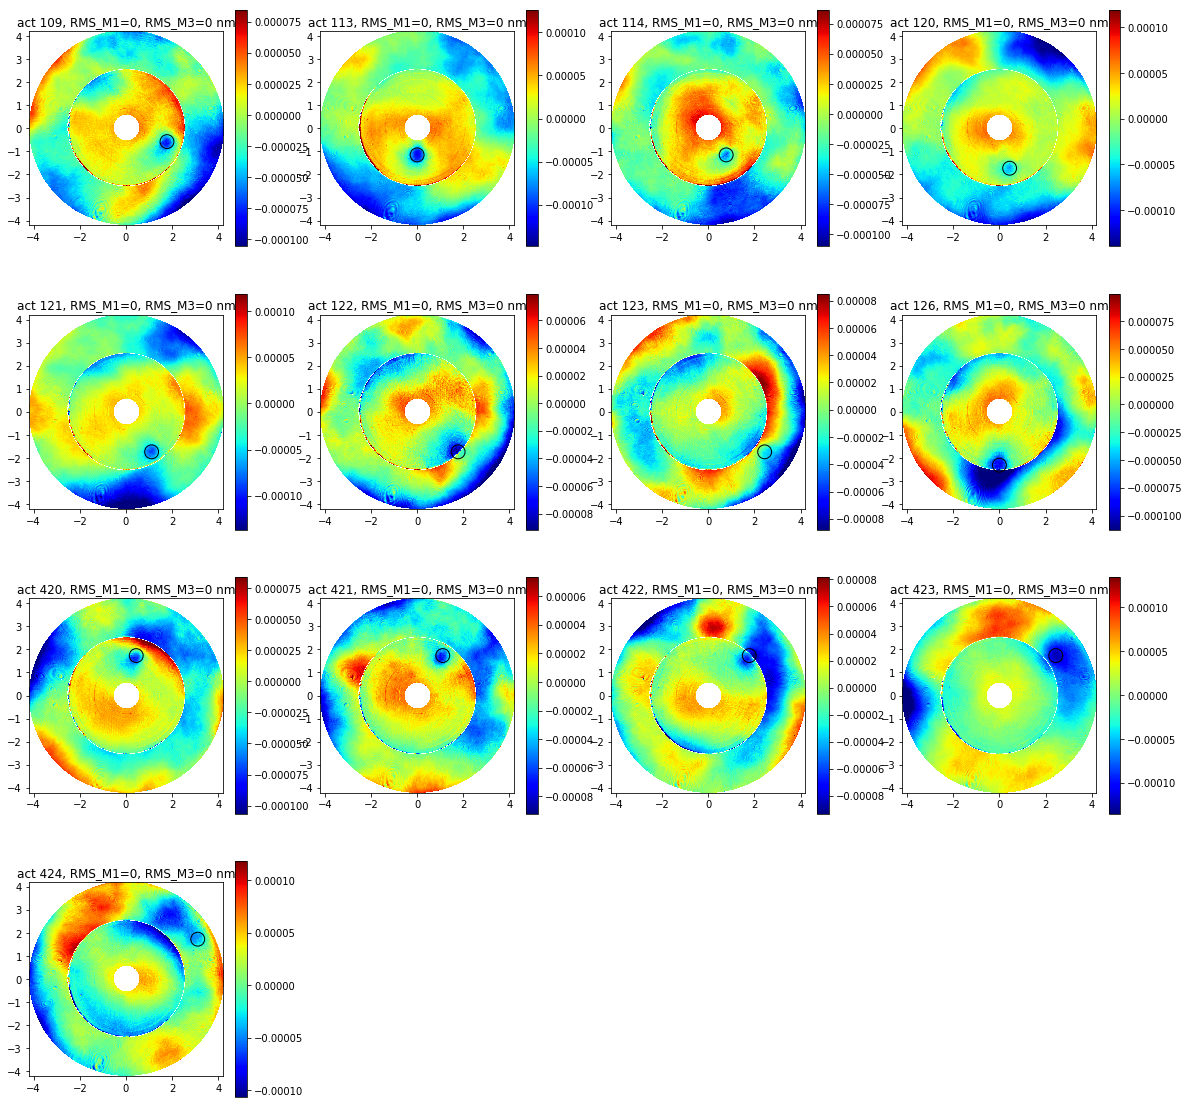

In [10]:
testID = '4-7' 
fig, ax = plt.subplots(4,4,figsize=(20,5*4))
i = 0
for modeID in sorted(mode2actID):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
        testID, modeID, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s/Combined/*Residual*%d.h5'%(
    dataDir, dateID, testID, modeID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')

    [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
    [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
    s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm

    vmean = np.mean(s[~np.isnan(s)])
    vmin = vmean-3*np.std(s[~np.isnan(s)]-vmean)
    vmax = vmean+3*np.std(s[~np.isnan(s)]-vmean)
    
    img = ax[irow][icol].imshow(s, origin='lower', extent = [x1[0,0], x1[0,-1], y1[0,0], y1[-1,0]], vmin=vmin, vmax=vmax)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('act %d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(modeID, m1rms, m3rms))
    
    actIdx = np.where(actID == modeID)[0][0]
    circ = Circle((xact[actIdx],yact[actIdx]),0.3, fill = False)
    ax[irow][icol].add_patch(circ)

fig.delaxes(ax.flatten()[-3])
fig.delaxes(ax.flatten()[-2])
fig.delaxes(ax.flatten()[-1])    

### Optimize M1-M3-M1 figure using LSST bending modes

4-8 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190214_4-8 LSST Bending Modes/M1 set0 190214 4-8.h5: Thu Feb 14 13:52:05 2019 
/Processed/190214_4-8 LSST Bending Modes/M3 set0 190214 4-8.h5: Thu Feb 14 13:52:05 2019 
4-8 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190214_4-8 LSST Bending Modes/M1 set1 190214 4-8.h5: Thu Feb 14 15:07:38 2019 
/Processed/190214_4-8 LSST Bending Modes/M3 set1 190214 4-8.h5: Thu Feb 14 15:07:16 2019 
4-8 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190214_4-8 LSST Bending Modes/M1 set2 190214 4-8.h5: Thu Feb 14 15:34:33 2019 
/Processed/190214_4-8 LSST Bending Modes/M3 set2 190214 4-8.h5: Thu Feb 14 15:34:29 2019 
4-8 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190214_4-8 LSST Bending Modes/M1 set3 190214 4-8.h5: Thu Feb 14 15:58:50 2019 
4-8 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190214_4-8 LSST Bending 

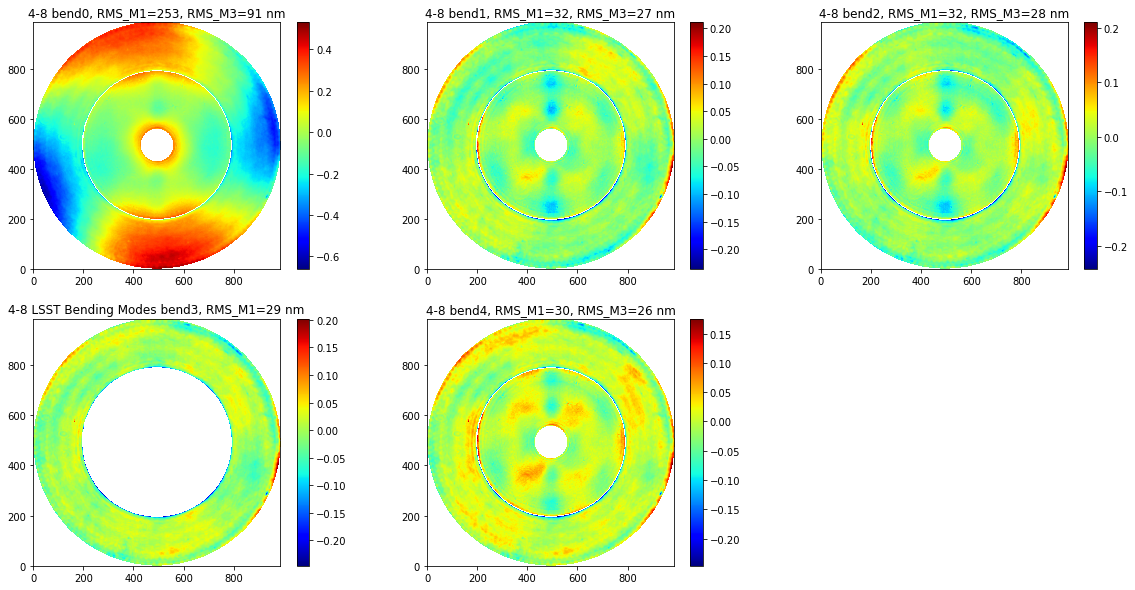

In [26]:
testID = '4-8'
iter = ' LSST Bending Modes'
fig, ax = plt.subplots(2,3,figsize=(20,5*2))
i = 0
for bend in range(5):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))

    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M1 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)))
    if len(fileset) == 0:
        pass
    else:
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)

        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(s, origin='lowerleft')  
        ax[irow][icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[irow][icol])

fig.delaxes(ax.flatten()[-1])    

/Users/bxin/largeData/M1M3_ML/Processed/190214_4-8 LSST Bending Modes/M1M3 set0 190214 4-8M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190214_4-8 LSST Bending Modes/M1M3 set1 190214 4-8M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190214_4-8 LSST Bending Modes/M1M3 set2 190214 4-8M1M3 fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190214_4-8 LSST Bending Modes/M1 set3 190214 4-8 -FC fit mode amps.csv
/Users/bxin/largeData/M1M3_ML/Processed/190214_4-8 LSST Bending Modes/M1M3 set4 190214 4-8M1M3 fit mode amps.csv


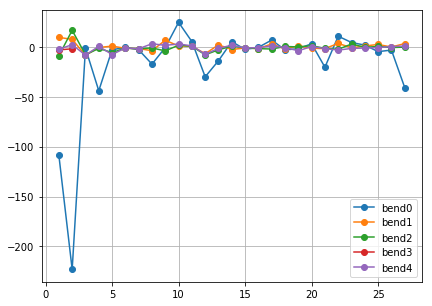

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
for bend in range(5):
    csvName = '%s/Processed/%d_%s%s/M1M3 set%d %s %sM1M3 fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    if not os.path.isfile(csvName):
        csvName = '%s/Processed/%d_%s%s/M1 set%d %s %s -FC fit mode amps.csv'%(
            dataDir, dateID, testID, iter, bend, dateID, testID)
    print(csvName)
    df = pd.read_csv(csvName, header=None)
    ax[0].plot(df[0], df[1], '-o', label='bend%d'%bend)
    ax[1].plot(df[0], df[1], '-o', label='bend%d'%bend)
leg = ax[0].legend()
leg = ax[1].legend()
ax[0].grid()
ax[1].grid()
ax[1].set_title('zoom-in on on y')
aa = ax[1].set_ylim([-50, 50])
fig.delaxes(ax.flatten()[-1]) 

### Try Mirror Lab bending mode

4-8 bend0 ------ irow = 0, icol = 0, -----------------------------
/Users/bxin/largeData/M1M3_ML/Processed/190214_4-8 ML Bending Modes/M1M3 set0 190214 4-8.h5
/Processed/190214_4-8 ML Bending Modes/M1M3 set0 190214 4-8.h5: Thu Feb 14 13:52:05 2019 
/Processed/190214_4-8 ML Bending Modes/M1M3 set0 190214 4-8.h5: Thu Feb 14 13:52:05 2019 


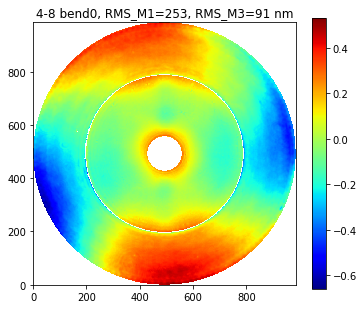

In [137]:
testID = '4-8'
iter = ' ML Bending Modes'
fig, ax = plt.subplots(1,3,figsize=(20,5*1))
i = 0
for bend in range(1):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    pattern = '%s/Processed/%d_%s%s/M1M3 set%d %s %s.h5'%(
        dataDir, dateID, testID, iter, bend, dateID, testID)
    fileset = sorted(glob.glob(pattern))
    print(pattern)
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset,'/M1Data')
    m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset,'/M3Data')
        
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    if len(fileset) == 0:
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))
    else:
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
        img = ax[icol].imshow(s, origin='lowerleft')  
        ax[icol].set_title('%s bend%d, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, bend, m1rms, m3rms))
    fig.colorbar(img, ax=ax[icol])

fig.delaxes(ax.flatten()[-1])    
fig.delaxes(ax.flatten()[-2])   

### Section 5.1 of the test plan
measuring M1 and M3 with lateral actuator force (1200 N total in the X direction).

5-1 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M1 ref-1 burst50 morph -.h5: Thu Feb 14 13:59:30 2019 
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M1 ref-2 burst50 morph -.h5: Thu Feb 14 14:23:49 2019 
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M3 ref-1 burst20 morph -.h5: Thu Feb 14 14:31:31 2019 
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M3 ref-2 burst20 morph -.h5: Thu Feb 14 14:38:11 2019 
5-1 ------ irow = 0, icol = 1, -------Looking at following files ---------------
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M1 xforce100-1 burst50 morph -.h5: Thu Feb 14 14:14:40 2019 
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M1 xforce100-2 burst50 morph -.h5: Thu Feb 14 14:18:27 2019 
/2019-04-24_Data_Addendum/Processed/190214_5-1/190214 5-1 M3 xforce100-1 burst20 morph -.h5: Thu Feb 14 14:34:30 2019 
/2019-04-24_Data_Addendum/Pro

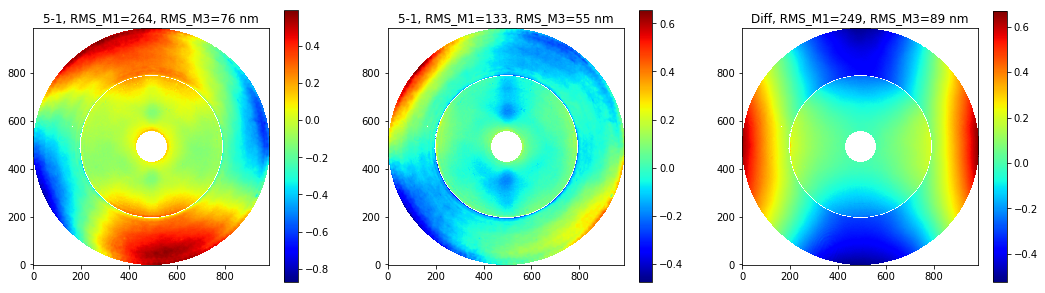

In [25]:
testID = '5-1'
istr = ['ref', 'xforce100']
fig, ax = plt.subplots(1,3,figsize=(18,5))
irow = 0
icol = 0
for i in range(3):
    if i<2:
        print('%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
            testID, irow, icol))
        pattern = '%s/2019-04-24_Data_Addendum/Processed/%d_%s/%d %s M1 %s-*-.h5'%(
                dataDir, dateID, testID, dateID, testID, istr[i])
        fileset = sorted(glob.glob(pattern))
        if len(fileset) == 0:
            print(pattern)    
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
        pattern = '%s/2019-04-24_Data_Addendum/Processed/%d_%s/%d %s M3 %s-*-.h5'%(
                dataDir, dateID, testID, dateID, testID, istr[i])
        fileset = sorted(glob.glob(pattern))
        if len(fileset) == 0:
            print(pattern)    
        m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset)
        [x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
        [x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
        s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
        if i==0:
            refs = s.copy()
            m1refs = m1s.copy()
            m3refs = m3s.copy()
        
    else:
        s = s - refs
        m1s = m1s - m1refs
        m3s = m3s - m3refs
        testID = 'Diff'

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    m3rms = np.std(m3s[~np.isnan(m3s)])*1000 #convert into nm
    img = ax[icol].imshow(s, origin='lowerleft')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s, RMS_M1=%.0f, RMS_M3=%.0f nm'%(testID, m1rms, m3rms) )

    icol += 1
